Final Project
<br>
ECON 220
<br>
Authors: Alex Issokson, Genevieve DeBell, and Khushi Niyyar

Introduction:
<br>
Motivation: Inequality, especially in income, is rising in the U.S. Inequality is bad for the economy because it can lead to crashes. Income inequality can also lead to obesity and unhappiness, as well as more violent crime. In this article from the federal reserve, it shows that Black and Hispanic households hold only 2.9% and 2.8%, respectively, despite accounting for 15.6% and 10.9% of the U.S. population, respectively. On average, Black and Hispanic households earn about half as much as the average White household. These numbers show that this is clearly a prevalent issue in our country and that is the motivation for our research question, especially since the data from this article goes up until 2019. The COVID-19 pandemic may have affected this shift, so we want to look at what the difference is in income now between White Americans and everyone else.

https://www.federalreserve.gov/econres/notes/feds-notes/wealth-inequality-and-the-racial-wealth-gap-20211022.html
<br>

Importance: Our question is important because wage disparities between races (and sexes as well, for that matter) has been an issue in the U.S. for a long time. By looking at recent trends, we can start to look into how much that has been a problem in recent years. On average, White Americans make more than Black and Hispanic Americans as well as other Americans who identify with another race or with multiple races. We even read an article in the main section of our ECON 220 class that showed how in 2015, white Americans had a higher average income than black Americans across the board, even when comparing them within the same categories, such as highest level of school completed. Income is a key determiner of wealth, because earning money contributes to someone's wealth. Race and income should not be positively correlated, so our question aims to check that correlation.

https://gallery.mailchimp.com/bf2b9b3cf3fdd8861943fca2f/files/Umbrellas_Dont_Make_It_Rain8.pdf

Literature Review:
<br>
Article 1: Race and Economic Opportunity in the United States: an Intergenerational Perspective
<br>
https://academic.oup.com/qje/article/135/2/711/5687353

Summary: This article studies the sources of racial income disparities in the United States by using anonymized longitudinal data covering nearly the entire US population from 1989 to 2015 to examine the black-white income gap. This article focuses on black and white men, because they found no differences in income between black and white women. Using de-identified data from censuses linked to data from income tax return, a four-part analysis was conducted. The study first characterized intergenerational gaps by race, measured children’s incomes as their mean household income when they were in their mid thirties, measured parents’ income as mean household income between 1994 and 2000, and finally measured intergenerational mobility using a rank specification. 

Findings: This analysis found that the largest racial income gap is between black and white people. This gap is perpetuated by segregation, proposing that black and white people examined in this study may have different outcomes because they tend to live in different neighborhoods. While honing in on the large gap between black and white Americans, this study also found nuance among a variety of racial groups. Notably, black and American Indian children have lower rates of upward mobility and higher rates of downward mobility than white children, while hispanic children have relatively high rates of upward mobility and are moving up in the income distribution across generations. This study concluded that a program that closes the gap in opportunity between black and white children at a parental income level, perhaps in the form of a trust, could eliminate much of the income gap in as little as two generations. 

<br>
Article 2: Race Matters: Income Shares, Income Inequality, and Income Mobility for All U.S. Races | Demography | Duke University Press
<br>
https://read.dukeupress.edu/demography/article/56/3/999/167998/Race-Matters-Income-Shares-Income-Inequality-and

Summary: This article uses unique linked data to conduct an analysis of income inequality and mobility by race and ethnicity. Researchers used data that include an administrative source of income for the population of US income tax filers over 15 years, and the race and ethnicity of each observation. Using this data helped the researchers overcome usual limitations because the Internal Revenue Service tax data was linked at the person level to Census Bureau data on rice and hispanic origin. The study was mainly motivated by the knowledge that race matters for economic and social outcomes, and that there are stark disparities in everything from wage to health outcomes across racial groups in the United States. Furthermore, a recent rise in income inequality has been largely unexplored, and this article aims to explain it along racial and ethnic lines.

Findings: The main finding of this analysis was the uncovering of a rigid income structure, with white and Asian people positioned at the top, and black people, American Indians, and Hispanics confined to the bottom. Whites tend to have a disproportionately large share of income in top quantiles, and all other races occupy a disproportionately large share of the income distribution in the bottom 10% and 1% of the whole income distribution. An interesting finding of this article was a novel rate of income growth at the 90th percentile of the income distribution, which exceeds that at the 50th percentile for all racial and ethnic groups. This means that the top part of the income distribution is diverging from the rest at a fast rate, and the middle income part of the distribution is diverging from the bottom. This growth trend is most pronounced among white people. However, income mobility decreased for all racial and ethnic groups between 2000 and 2014, contributing to a rigid distribution of income among races. 

<br>
Article 3: What’s Policy Got to Do with It? Race, Gender, and Economic Inequality in the United States 
<br>
https://www.jstor.org/stable/48563035?searchText=&searchUri=&ab_segments=&searchKey=&refreqid=fastly-default%3A64051b3b2a29ac23d1814473e80c2e02

Summary: This article was based on the knowledge that economic inequality is both racialized and gendered, and that public policy bears great weight in its relation to racial inequalities in economic positions among women. The study focused on women because, “Comparisons to men across and within racial groups are often highlighted over and above differences between women. By focusing on comparisons among women, we show that across most metrics of economic well-being, black and latina women are considerably disadvantaged.” The analysis aims to investigate whether and how social and economic policies differentially shape women’s economic positioning across racial and ethnic groups. The contributors to this article achieve this analysis by charting disparities between white women and women of color across economic indicators. They begin by defining four dimensions of economic status for black, white, and latina women: educational attainment, employment status, earnings, and poverty. They then used these dimensions to construct an economic index with data from the Annual Social and Economic Supplement of the Current Population Survey. 

Findings: This examination of public policy in relation to economic inequality uncovered that there is significant disparity in the relationship between economic policy and the economic status of women across racial and ethnic groups. A major finding from the earnings section of the index was that white women’s median weekly earnings were $814, compared with $673 for black women and $618 for latina women, taken from data from 2017. The central argument of this article derived from those findings is that women’s economic positioning and the policies that shape it are highly differentiated across racial and ethnic groups. 

<br>
Article 4: Race and Human Capital
<br>
https://www-jstor-org.proxy.library.emory.edu/stable/1805133

Summary: This paper looked at the differences in race and human capital immediately after the Civil War up until the 1980s, specially for black and white men. The author used underutilized Census data from the 1890 Census to the 1980 Census to examine the income positions of black individuals for all post slavery birth cohorts. This microanalysis allowed the author to gain a deeper, more holistic understanding of the data and situation. The author then took a historical perspective to examine other factors, including education and literacy, to see if he could find a relationship between the expansions on these fronts and relative income and human capital for Black Americans. He separated the data into two periods–immediately after the Civil War and at the onset of the 20th century. The author examined the differences and growth in mean education and mean income–his focus here, however, had to be on post-1940s data, as the 1940 Census was the first to include income. Before 1940, the author relied on data of the occupation distribution of the workforce by race to study this relationship long-term and examine how the distribution of the different races in each occupation changed over time. 

Findings: The author found that the ratio of black-white income has increased over the past few decades, especially since 1960 with the Civil Rights Act. For men, racial disparities grew larger immediately after the Civil War. The author further analyzed the relative racial income through the lens of education and found that when comparing the racial differences in mean schooling levels, immediately following the Civil War, the amount of Black students in schools increased by nearly six-fold. Despite this expansion, in the early 1900s, the disparity between Black and white members of the population grew. After this time, the difference in schooling significantly narrowed. In terms of relative income by race, the author discovered that relative income of black men to white men increased from 1890 to 1920, stayed relatively the same until 1940 when it then increased quickly and steadily until the 1980s. While the author cannot attest to differences with specific occupations, within each birth cohort, there does appear to be a significant decline in relative income for black men over time. To visualize this data, the author created tables that examined black-white male income ratios per five-year birth cohort for 1940s onward. 

<br>
Article 5: Income Inequality and the Persistence of Racial Economic Disparities
<br>
https://sociologicalscience.com/articles-v5-8-182/

Summary: This author focused their paper on the fundamental income inequalities between races that remain relatively unchanged from 1960 to the modern-day. They argue that the persistence of this gap comes from the shape of the income distribution. Therefore, they make the case that U.S. society favors the rich more and more over time. Hence, resources go toward the ultra-wealthy, leading to the economic stagnation of other groups. Racial inequality gets heightened because of this situation, as it is particularly harmful to the Black population, who are highly underrepresented in the top one percent. To analyze these numbers, the author separated the overall data from medians and means to analyze differences in trends in “income earned at each rank.” Using microdata from the CPS obtained from IPUMS, the author looked at the years from 1968 to 2016 and analyzed the black-white family income disparities during that time, separately looking at income ranks and their respective benefits so that they can separate changes due to the income distribution shape from changes to the black and white income ranks. Ranks are found by calculating the income percentiles for the whole United States population, not just stratified by race. 

Findings: 
The author discussed “occupational segregation by race” in that white people tend to hold better and higher earning jobs than their black counterparts, meaning that the racial income gap depends on which jobs go to which people. This is decreasing but still exists, and even in the same jobs, black people earn less than white people with similar qualifications. The author further found that the ratio of black to white mean and median annual family income remained relatively unchanged over time. While the average Black individual occupies a higher average rank then they did in 1968, the average black family income at the 25th percentile fell much more than their white counterparts’ did. The author checked this information by narrowing the sample to adults and only native-born U.S. citizens, all of which affirmed their findings. Incomes truly only rose for the top ten percent of Black Americans and the poorest 70 percents’ income shares fell dramatically. The author then constructed a hypothetical situation in which income inequality had not gone up to see what would happen to racial disparities and saw that the racial income gap would have closed by thirty percent.

<br>
Article 6: The Impact of Economic Freedom on the Black/White Income Gap
<br>
https://www-jstor-org.proxy.library.emory.edu/stable/pdf/43821950.pdf?refreqid=excelsior%3A90adca28ddb316885fdf403c07474c79&ab_segments=&origin=&initiator=&acceptTC=1

Summary: The paper studied whether the ratio of real median income in black families to real median income in white families could be explained by economic freedom. It utilized state-level data for the 1980- 2010 census years from the IPUMS 5 percent sample in 1980, 1990, and 2000 and the 1 percent sample in 2010 and Bueno et al.’s index of economic freedom. The authors used a standard panel model and controlled variables in regressions and examined the log of black and white median income and the ratio between them. The author found that higher levels of economic freedom are correlated with a greater racial income gap for Black and white Americans. 

Findings: In their analysis, the authors uncovered that higher levels of economic freedom (defined by the ability to make economic decisions without outside pressure) are associated with higher income levels in both Black and white Americans. What’s more, they found that higher levels of economic freedom were negatively correlated with the black/white income ratio. Economic freedom results in a higher association in white households than black ones, meaning that an increase in economic freedom would result in the worsening of the black white/income ratio, consistent with other research that placed Black Americans in the bottom of the income distribution. The authors even ran regressions with other variables that would affect economic freedom as explanatory variables, and in none of their analyses did an increase in economic freedom lead to a higher ratio of black income to white income. 


Data:
<br>
Data Source: The source of data that we will be using is IPUMS USA. IPUMS USA collects, preserves, and harmonizes U.S. census microdata and
provides easy access to this data.
<br>
Variables: The variables that we will be using are total personal income (denoted by "INCTOT" on IPUMS USA), and race (denoted by "RACE" on IPUMS USA).

In [1]:
#Find working directory
import os
path = os.getcwd()
#print(path)

/Users/Commish/Documents/ECON 220/Homework


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'/Users/Commish/Documents/ECON 220/Data/usa_00003.csv.gz')

In [4]:
data.head()

,SEX,AGE,RACE,RACED,INCTOT
0,1,85,1,100,15000
1,2,67,2,200,4800
2,1,74,1,100,36000
3,1,16,1,100,0
4,1,83,1,100,7200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252599 entries, 0 to 3252598
Data columns (total 5 columns):
 #   Column  Dtype
---  ------  -----
 0   SEX     int64
 1   AGE     int64
 2   RACE    int64
 3   RACED   int64
 4   INCTOT  int64
dtypes: int64(5)
memory usage: 124.1 MB


In [6]:
pd.options.display.float_format = '{:.4f}'.format

In [20]:
data['SEX'].agg(['mean', 'std', 'min', 'max', 'count'])

mean          1.5088
std           0.4999
min           1.0000
max           2.0000
count   3252599.0000
Name: SEX, dtype: float64

In [21]:
data['AGE'].agg(['mean', 'std', 'min', 'max', 'count'])

mean         42.6173
std          23.8774
min           0.0000
max          96.0000
count   3252599.0000
Name: AGE, dtype: float64

In [22]:
data['RACE'].agg(['mean', 'std', 'min', 'max', 'count'])

mean          2.5319
std           2.5995
min           1.0000
max           9.0000
count   3252599.0000
Name: RACE, dtype: float64

In [23]:
data['RACED'].agg(['mean', 'std', 'min', 'max', 'count'])

mean        257.3677
std         267.0510
min         100.0000
max         990.0000
count   3252599.0000
Name: RACED, dtype: float64

In [24]:
data['INCTOT'].agg(['mean', 'std', 'min', 'max', 'count'])

mean    1609700.4247
std     3622365.1070
min      -11100.0000
max     9999999.0000
count   3252599.0000
Name: INCTOT, dtype: float64

In [12]:
#Create "fem" variable: 1 if female, 0 if not
data['Female'] = data['SEX']==2
#Convert to integer
data['Female'] = data['Female'].astype('int')
data[['SEX', 'Female']] # Check

,SEX,Female
0,1,0
1,2,1
2,1,0
3,1,0
4,1,0
...,...,...
3252594,1,0
3252595,2,1
3252596,1,0
3252597,1,0


In [13]:
def white(x):
    if (x == 1):
        return 1
    else:
        return 0
    
data['White'] = data['RACE'].apply(white)
data[['RACE', 'White']].head()

,RACE,White
0,1,1
1,2,0
2,1,1
3,1,1
4,1,1


In [14]:
def black(x):
    if (x == 2):
        return 1
    else:
        return 0
    
data['Black'] = data['RACE'].apply(black)
data[['RACE', 'Black']].head()

,RACE,Black
0,1,0
1,2,1
2,1,0
3,1,0
4,1,0


In [15]:
def other(x):
    if (x >= 3):
        return 1
    else:
        return 0
    
data['Other Race'] = data['RACE'].apply(other)
data[['RACE', 'Other Race']].head()

,RACE,Other Race
0,1,0
1,2,0
2,1,0
3,1,0
4,1,0


In [16]:
data.head()

,SEX,AGE,RACE,RACED,INCTOT,Female,White,Black,Other Race
0,1,85,1,100,15000,0,1,0,0
1,2,67,2,200,4800,1,0,1,0
2,1,74,1,100,36000,0,1,0,0
3,1,16,1,100,0,0,1,0,0
4,1,83,1,100,7200,0,1,0,0


We are not splitting up our variables much besides how they are already separated since race is one of our major variables. If we were to split up personal income into multiple categories, it would look subjective based on what different people consider to be "a lot" versus "a little". So, we will start by having one plot showing total income by race (all of them). Then, we will have another plot showing total personal income by non-white (0) and white (1) people.

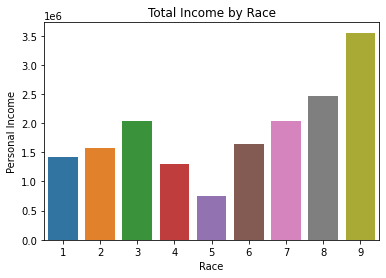

In [19]:
bar = sns.barplot(data = data, x = 'RACE', y = 'INCTOT', ci = None);
bar.set(title = 'Total Income by Race', xlabel = 'Race', ylabel = 'Personal Income');

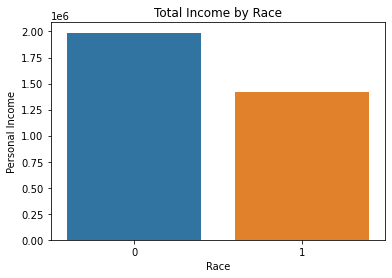

In [26]:
bar = sns.barplot(data = data, x = 'White', y = 'INCTOT', ci = None);
bar.set(title = 'Total Income by Race', xlabel = 'Race', ylabel = 'Personal Income');

Bibliography:
Steven Ruggles, Sarah Flood, Matthew Sobek, Danika Brockman, Grace Cooper,  Stephanie Richards, and Megan Schouweiler. IPUMS USA: Version 13.0 [dataset]. Minneapolis, MN: IPUMS, 2023.
https://doi.org/10.18128/D010.V13.0

In [ ]:
!jupyter nbconvert --to html Final Project.ipynb